In [40]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [41]:
# 10번방의 선물 관람객 
pre = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=94775&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=highest&page="
review = []     # 리뷰리스트
rate = []    # 평점 리스트


# 
for i in range(1, 4460, 40):
    url = pre + str(i)
    res = requests.get(url)

    soup = BeautifulSoup(res.content,'html.parser')

    id_list = []
    id_pre = "_filtered_ment_"

    for i in range(10):
        id_list.append(id_pre+str(i))

    for id in id_list:
        review.append(soup.find("span", {"id":id}).get_text().strip())

        rate_list = []
        rate_list = (soup.select("div.star_score > em"))

    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

df = pd.DataFrame({"review" : review, "rate" : rate})

In [42]:
df

,review,rate
0,평생 보면서 이렇게 많이 운 영화는 처음 이였어요.. 배우분들 연기가 대박이여서 더...,10
1,이영화 까는 방구석여포들 ㅋㅋㅋ 영화는영화로봐라 뭔 장애인 말다나오냐 개한심하네 이...,10
2,다시보도 눈물이나네여,10
3,정말 최고의 감동을 받았습니다,10
4,5살 딸가진 아빠로써 많은 감정을 갖게 된 영화였네요.. 사랑하는 우리딸.. 고마워.,10
...,...,...
1115,에이,1
1116,재미는 있는데 상활설정이 어설퍼서 그랬습니다... 9점넘을 정도는 아니라 점수 맞춘...,1
1117,싸구려 감동 코미디 좋아하네~ 레알 현실에서는 용구빼고는 다 강력범죄자뿐인데..,1
1118,평점 7점 정도면 적당한 영화가 아닐까?.. 연기 스토리 무엇하나 좋았던 부분이 없다.,1


In [43]:
len(df)

1120

In [44]:
df.isnull().sum() # 결측치 확인하기

review    0
rate      0
dtype: int64

In [45]:
df.to_csv('review_HW.csv') # 데이터프레임을 CSV 파일로 저장하기
df

,review,rate
0,평생 보면서 이렇게 많이 운 영화는 처음 이였어요.. 배우분들 연기가 대박이여서 더...,10
1,이영화 까는 방구석여포들 ㅋㅋㅋ 영화는영화로봐라 뭔 장애인 말다나오냐 개한심하네 이...,10
2,다시보도 눈물이나네여,10
3,정말 최고의 감동을 받았습니다,10
4,5살 딸가진 아빠로써 많은 감정을 갖게 된 영화였네요.. 사랑하는 우리딸.. 고마워.,10
...,...,...
1115,에이,1
1116,재미는 있는데 상활설정이 어설퍼서 그랬습니다... 9점넘을 정도는 아니라 점수 맞춘...,1
1117,싸구려 감동 코미디 좋아하네~ 레알 현실에서는 용구빼고는 다 강력범죄자뿐인데..,1
1118,평점 7점 정도면 적당한 영화가 아닐까?.. 연기 스토리 무엇하나 좋았던 부분이 없다.,1


In [46]:
# !pip install konlpy
# !pip install wordcloud

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [22]:
df = pd.read_csv("review_HW.csv")
df

,Unnamed: 0,review,rate
0,0,평생 보면서 이렇게 많이 운 영화는 처음 이였어요.. 배우분들 연기가 대박이여서 더...,10
1,1,이영화 까는 방구석여포들 ㅋㅋㅋ 영화는영화로봐라 뭔 장애인 말다나오냐 개한심하네 이...,10
2,2,다시보도 눈물이나네여,10
3,3,정말 최고의 감동을 받았습니다,10
4,4,5살 딸가진 아빠로써 많은 감정을 갖게 된 영화였네요.. 사랑하는 우리딸.. 고마워.,10
...,...,...,...
1115,1115,에이,1
1116,1116,재미는 있는데 상활설정이 어설퍼서 그랬습니다... 9점넘을 정도는 아니라 점수 맞춘...,1
1117,1117,싸구려 감동 코미디 좋아하네~ 레알 현실에서는 용구빼고는 다 강력범죄자뿐인데..,1
1118,1118,평점 7점 정도면 적당한 영화가 아닐까?.. 연기 스토리 무엇하나 좋았던 부분이 없다.,1


In [49]:
df.isnull().sum()

review    0
rate      0
dtype: int64

In [50]:
#결측치 제거
df = df.dropna()

In [51]:
okt = Okt() #세종사전 실행하기

In [52]:
#단어 리스트 만들기
word_list = []
word_list = df['review']

In [53]:
#형태소 분리하기
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [28]:
sentences_tag

[[('평생', 'Noun'),
  ('보면서', 'Verb'),
  ('이렇게', 'Adverb'),
  ('많이', 'Adverb'),
  ('운', 'Noun'),
  ('영화', 'Noun'),
  ('는', 'Josa'),
  ('처음', 'Noun'),
  ('이였어요', 'Verb'),
  ('..', 'Punctuation'),
  ('배우', 'Noun'),
  ('분들', 'Suffix'),
  ('연기', 'Noun'),
  ('가', 'Josa'),
  ('대박', 'Noun'),
  ('이', 'Suffix'),
  ('여서', 'Josa'),
  ('더', 'Noun'),
  ('이입', 'Noun'),
  ('된', 'Verb'),
  ('것', 'Noun'),
  ('같아요', 'Adjective'),
  ('ㅠ', 'KoreanParticle'),
  ('진짜', 'Noun'),
  ('인생', 'Noun'),
  ('영화', 'Noun'),
  ('!', 'Punctuation')],
 [('이영화', 'Noun'),
  ('까는', 'Verb'),
  ('방구', 'Noun'),
  ('석', 'Modifier'),
  ('여포', 'Noun'),
  ('들', 'Suffix'),
  ('ㅋㅋㅋ', 'KoreanParticle'),
  ('영화', 'Noun'),
  ('는', 'Josa'),
  ('영화로', 'Noun'),
  ('봐라', 'Verb'),
  ('뭔', 'Modifier'),
  ('장애인', 'Noun'),
  ('말다', 'Verb'),
  ('나오냐', 'Verb'),
  ('개', 'Noun'),
  ('한심하네', 'Adjective'),
  ('이렇게', 'Adverb'),
  ('슬프', 'Adjective'),
  ('고재', 'Noun'),
  ('밋', 'Noun'),
  ('는', 'Verb')],
 [('다시', 'Noun'),
  ('보도', 'Noun'),
  ('눈물', 'Noun

In [54]:
#명사 추출하기
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

In [55]:
noun_list

['평생',
 '운',
 '영화',
 '처음',
 '배우',
 '연기',
 '대박',
 '더',
 '이입',
 '것',
 '진짜',
 '인생',
 '영화',
 '이영화',
 '방구',
 '여포',
 '영화',
 '영화로',
 '장애인',
 '개',
 '고재',
 '밋',
 '다시',
 '보도',
 '눈물',
 '이나',
 '정말',
 '최고',
 '감동',
 '살',
 '아빠',
 '로써',
 '감정',
 '영화',
 '사랑',
 '우리',
 '딸',
 '이',
 '영화',
 '작위',
 '신파',
 '악플',
 '분',
 '이영화',
 '스토리',
 '실제',
 '사건',
 '모티브',
 '정',
 '목사',
 '당시',
 '정권',
 '강압',
 '수사',
 '고문',
 '통한',
 '강제',
 '자백',
 '증거',
 '조작',
 '등',
 '사연',
 '영화',
 '것',
 '배경',
 '스토리',
 '소리',
 '거',
 '실화',
 '바탕',
 '실제',
 '도',
 '무기징역',
 '복역',
 '실제',
 '사건',
 '사형선고',
 '억지',
 '헛소리',
 '영화인',
 '외국',
 '추천',
 '영화',
 '순위',
 '외국',
 '평가',
 '더',
 '번방',
 '선물',
 '케플러',
 '강예서',
 '주연',
 '배우',
 '작품',
 '비난',
 '내용',
 '실화',
 '각색',
 '더',
 '마음',
 '아픔',
 '이',
 '실화',
 '말',
 '자',
 '이상',
 '점',
 '역대',
 '꿀잼',
 '눈물',
 '늬들',
 '감동',
 '거지',
 '억지',
 '니',
 '눈',
 '구멍',
 '눈물샘',
 '눈물',
 '탓',
 '표지',
 '보고',
 '개',
 '안',
 '영환',
 '데',
 '오늘',
 '보고',
 '거의',
 '판타지',
 '비',
 '현실',
 '내용',
 '류승룡',
 '기모찌',
 '감성',
 '팔이',
 '억지',
 '설정',
 '감동',
 '임',
 '사법살인',
 '부',
 '애',
 

In [31]:
#두글자 이상 단어만 추출하기
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['평생',
 '영화',
 '처음',
 '배우',
 '연기',
 '대박',
 '이입',
 '진짜',
 '인생',
 '영화',
 '이영화',
 '방구',
 '여포',
 '영화',
 '영화로',
 '장애인',
 '고재',
 '다시',
 '보도',
 '눈물',
 '이나',
 '정말',
 '최고',
 '감동',
 '아빠',
 '로써',
 '감정',
 '영화',
 '사랑',
 '우리',
 '영화',
 '작위',
 '신파',
 '악플',
 '이영화',
 '스토리',
 '실제',
 '사건',
 '모티브',
 '목사',
 '당시',
 '정권',
 '강압',
 '수사',
 '고문',
 '통한',
 '강제',
 '자백',
 '증거',
 '조작',
 '사연',
 '영화',
 '배경',
 '스토리',
 '소리',
 '실화',
 '바탕',
 '실제',
 '무기징역',
 '복역',
 '실제',
 '사건',
 '사형선고',
 '억지',
 '헛소리',
 '영화인',
 '외국',
 '추천',
 '영화',
 '순위',
 '외국',
 '평가',
 '번방',
 '선물',
 '케플러',
 '강예서',
 '주연',
 '배우',
 '작품',
 '비난',
 '내용',
 '실화',
 '각색',
 '마음',
 '아픔',
 '실화',
 '이상',
 '역대',
 '꿀잼',
 '눈물',
 '늬들',
 '감동',
 '거지',
 '억지',
 '구멍',
 '눈물샘',
 '눈물',
 '표지',
 '보고',
 '영환']

In [56]:
#단어별 갯수세기
counts = Counter(noun_list)
tags = counts.most_common(50)
tags

[('영화', 555),
 ('감동', 286),
 ('정말', 192),
 ('진짜', 182),
 ('눈물', 161),
 ('연기', 146),
 ('최고', 123),
 ('류승룡', 96),
 ('평점', 76),
 ('사람', 67),
 ('배우', 66),
 ('처음', 59),
 ('점', 58),
 ('스토리', 54),
 ('꼭', 54),
 ('생각', 50),
 ('재미', 50),
 ('더', 49),
 ('펑펑', 48),
 ('말', 46),
 ('완전', 44),
 ('대박', 42),
 ('보고', 42),
 ('추천', 40),
 ('웃음', 40),
 ('것', 39),
 ('이', 37),
 ('승', 37),
 ('번방', 35),
 ('만', 35),
 ('그냥', 35),
 ('강추', 35),
 ('정도', 35),
 ('거', 34),
 ('울', 34),
 ('선물', 31),
 ('다가', 30),
 ('이영화', 28),
 ('현실', 28),
 ('마지막', 27),
 ('웃기', 27),
 ('돈', 27),
 ('좀', 27),
 ('억지', 26),
 ('임', 26),
 ('짱', 26),
 ('가슴', 24),
 ('마음', 23),
 ('기도', 23),
 ('후회', 23)]

In [57]:
dic={("영화",593),('류승룡',84),('이영화',18),('진짜',175),('정말',161),('보고',59)}

In [58]:
#워드클라우드 생성하기
from PIL import Image # 워드클라우드용 마스크를 생성하기 위한 라이브러리 import

In [59]:
custom_mask = np.array(Image.open("heart.png"))

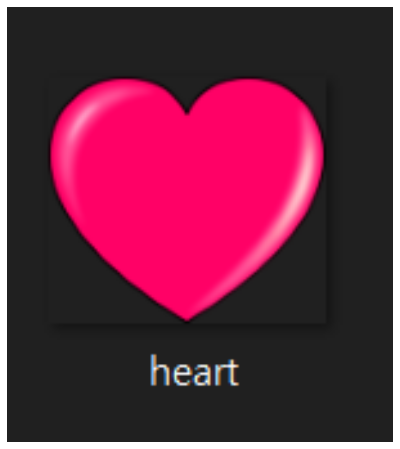

In [60]:
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(custom_mask) # 마스크용 사진의 색을 입력하기

{'영화': 555, '감동': 286, '정말': 192, '진짜': 182, '눈물': 161, '연기': 146, '최고': 123, '류승룡': 96, '평점': 76, '사람': 67, '배우': 66, '처음': 59, '점': 58, '스토리': 54, '꼭': 54, '생각': 50, '재미': 50, '더': 49, '펑펑': 48, '말': 46, '완전': 44, '대박': 42, '보고': 42, '추천': 40, '웃음': 40, '것': 39, '이': 37, '승': 37, '번방': 35, '만': 35, '그냥': 35, '강추': 35, '정도': 35, '거': 34, '울': 34, '선물': 31, '다가': 30, '이영화': 28, '현실': 28, '마지막': 27, '웃기': 27, '돈': 27, '좀': 27, '억지': 26, '임': 26, '짱': 26, '가슴': 24, '마음': 23, '기도': 23, '후회': 23}


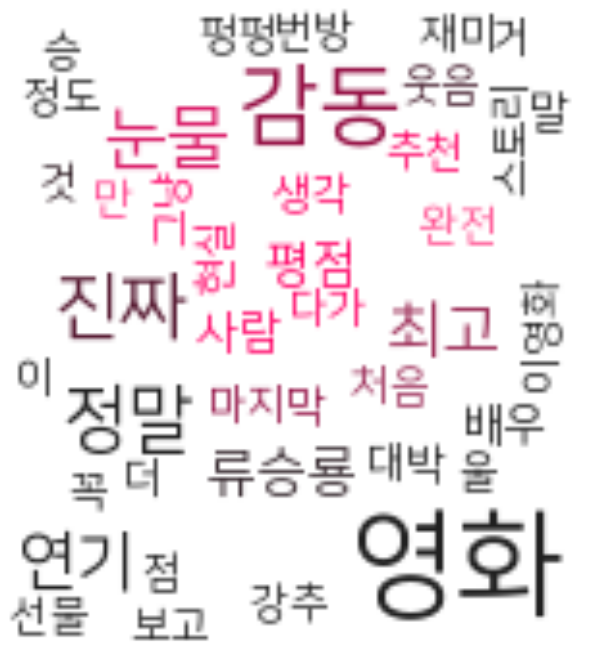

In [64]:
wordcloud = WordCloud(font_path="NanumSquareR.ttf",
                     background_color='white',width=800, height=600,
                     max_words=40, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=30)
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=image_colors), interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()